In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/athlete-events/athlete_events.csv


# Import the libraries

In [43]:
import pandas as pd
import seaborn as sns

# Import the data from the csv file 

In [44]:
olympics = pd.read_csv('/kaggle/input/athlete-events/athlete_events.csv')

# info summary, head 

In [45]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [46]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Import the data from the csv file 

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
impute_col = ['Year','Age','Height','Weight']

In [49]:
iter_impute = IterativeImputer(min_value=olympics[impute_col].min(),max_value = olympics[impute_col].max())

In [50]:
fit_col = iter_impute.fit_transform(olympics[impute_col])

In [51]:
olympics[impute_col] = fit_col

In [52]:
olympics['Medal'] = olympics['Medal'].fillna('NA')

In [53]:
olympics.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# check the numerical columns

In [54]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.600403,175.280009,70.952869,1978.378480
std,39022.286345,6.286884,9.348504,12.804718,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,25.000000,174.985438,70.064758,1988.000000
75%,102097.250000,28.000000,180.000000,77.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# histograms of the numerical columns

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

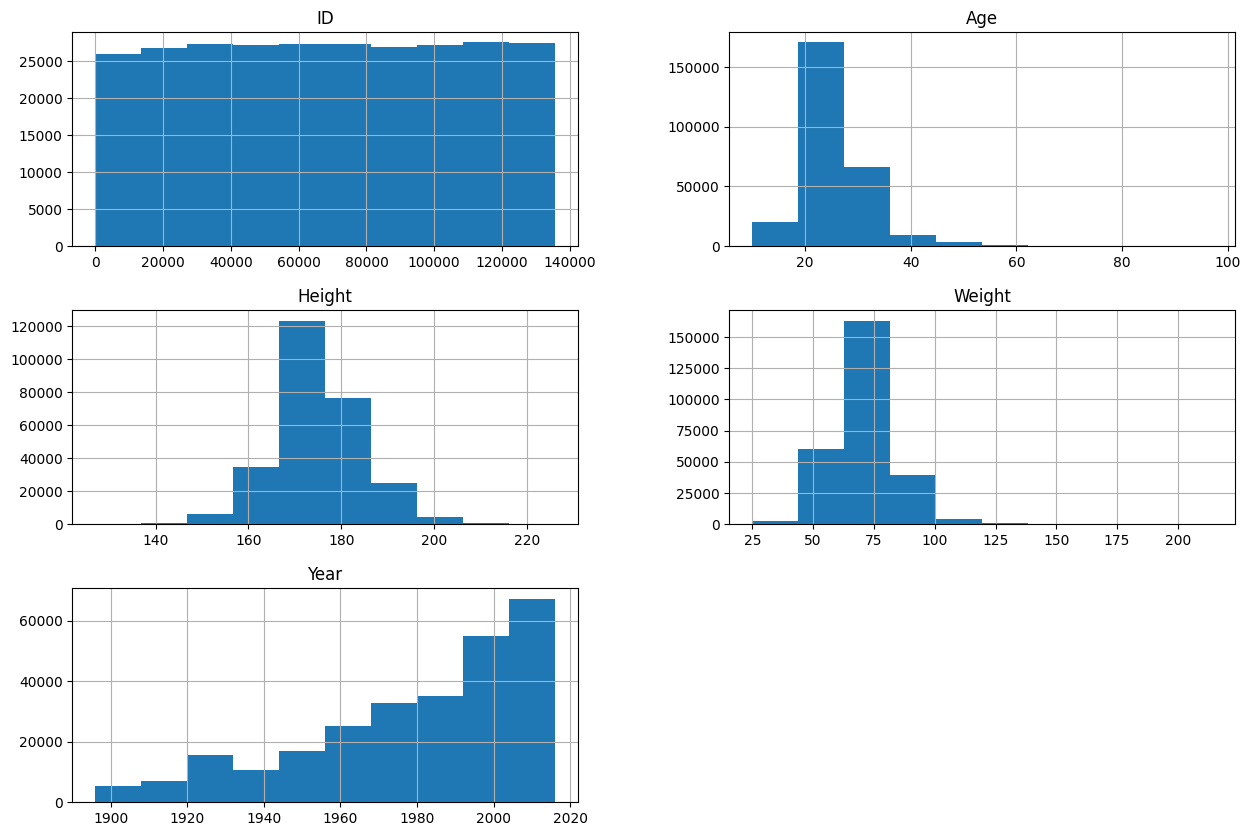

In [55]:
olympics.hist(figsize = (15,10))

# histogram with a rug plot

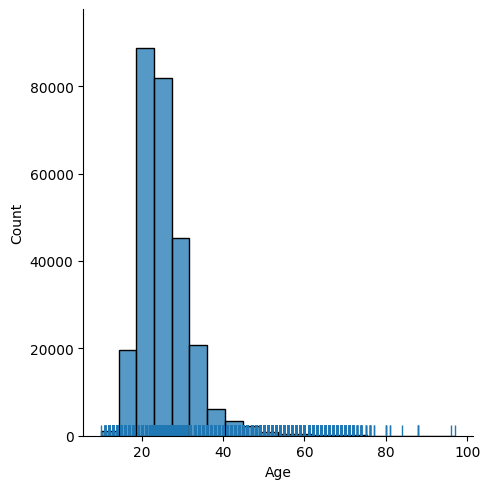

In [56]:
sns.displot(data = olympics, x ='Age', bins = 20, rug = True)

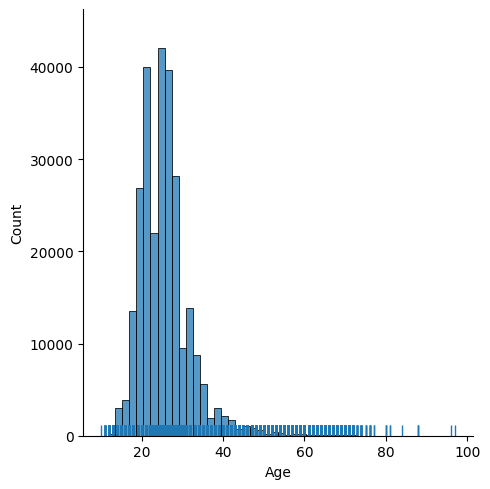

In [57]:
sns.displot(data = olympics, x ='Age', bins = 50, rug = True)

# Plot the boxplot by pandas

<Axes: >

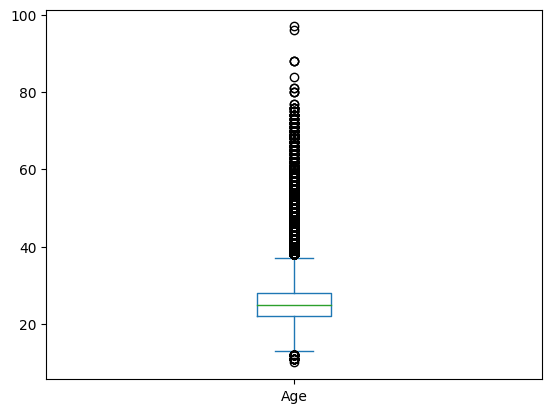

In [58]:
olympics['Age'].plot(kind = 'box')

# Plot the boxplot by Seaborn

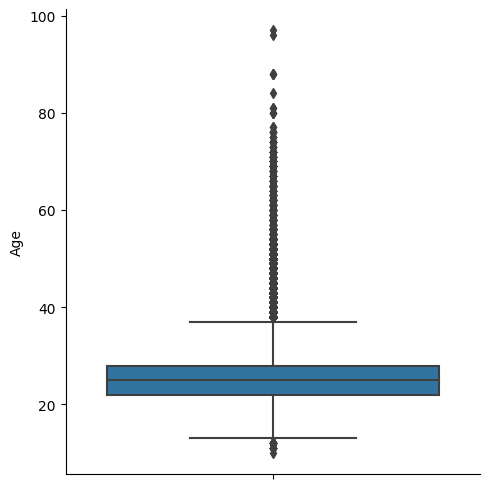

In [59]:
sns.catplot(data = olympics,y='Age', kind = 'box')

# Calculate the first quartile, third quartile, and IQR of the column Age

In [60]:
q1= olympics['Age'].quantile(0.25)
q3= olympics['Age'].quantile(0.75)
IQR = q3- q1
print(q1)
print(q3)
print(IQR)

22.0
28.0
6.0


In [61]:
print(f'Low age outlier threshold: {q1 - 1.5*IQR}')
print(f'High age outlier threshold: {q3 + 1.5*IQR}')

Low age outlier threshold: 13.0
High age outlier threshold: 37.0


# What are the Sport for the athletes of really young age?

In [62]:
msk_lower = olympics['Age'] < (q1 - 1.5*IQR)
olympics.loc[msk_lower,'Sport']

9648            Swimming
9649            Swimming
9650            Swimming
43468     Figure Skating
46955             Rowing
50291           Swimming
50292           Swimming
50293           Swimming
50294           Swimming
60911     Figure Skating
73461             Rowing
79024         Gymnastics
79352     Figure Skating
84361             Rowing
85840           Swimming
91910           Swimming
91911           Swimming
91912           Swimming
91913           Swimming
93850           Swimming
94058     Figure Skating
96236           Swimming
96665     Figure Skating
97086     Figure Skating
101378    Figure Skating
102916    Figure Skating
108031    Figure Skating
118048    Figure Skating
120233          Swimming
120234          Swimming
126542    Figure Skating
140650    Figure Skating
142882        Gymnastics
145150        Gymnastics
148942        Gymnastics
149033          Swimming
152798    Figure Skating
168941         Athletics
168942         Athletics
192507            Diving


# Did you find any sports popular for really young athletes?

In [63]:
olympics.loc[msk_lower,'Sport'].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

#  What are the Sport for the athletes of older age

In [64]:
msk_upper = olympics['Age'] > (q3 + 1.5*IQR)
olympics.loc[msk_upper,'Sport']

58        Art Competitions
89                 Sailing
90                 Sailing
124               Shooting
126               Shooting
                ...       
270955    Art Competitions
270970           Athletics
270971           Athletics
270972           Athletics
271090             Sailing
Name: Sport, Length: 11928, dtype: object

# Did you find any sports popular for older age athletes?

In [65]:
olympics.loc[msk_upper,'Sport'].value_counts()


Sport
Shooting                 3178
Art Competitions         2226
Equestrianism            1997
Sailing                  1040
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Water Polo                 29
Hockey                     29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Tug-Of-War                 15
Volleyball                 15
Judo

#  the number of unique values in each column

In [66]:
olympics.nunique()

ID        135571
Name      134732
Sex            2
Age          785
Height      2475
Weight      3565
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
dtype: int64

# the non-numerical columns

In [67]:
olympics.describe(exclude = 'number')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,NA
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333


# check for their unique values and counts

In [68]:
cat_col = olympics.select_dtypes(exclude = 'number').columns
cat_col

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [69]:
for column in cat_col:
    print(olympics[column].value_counts())
    print()
    

Name
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: count, Length: 134732, dtype: int64

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: count, Length: 1184, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: count, Length: 230, dtype: int64

Games
2000 Summer    13821

#  the first record within the dataset for each Olympic Sport

In [70]:
olympics.sort_values('Year').groupby('Sport').first()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Aeronautics,107506,Hermann Schreiber,M,26.000000,174.589865,71.098729,Switzerland,SUI,1936 Summer,1936.0,Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,32818,Reat Erce,M,17.000000,172.439922,66.363886,Turkey,TUR,1936 Winter,1936.0,Winter,Garmisch-Partenkirchen,Alpine Skiing Men's Combined,NA
Alpinism,74134,George Herbert Leigh Mallory,M,37.000000,176.995129,76.867544,Great Britain,GBR,1924 Winter,1924.0,Winter,Chamonix,Alpinism Mixed Alpinism,Gold
Archery,67722,Lecomte,M,27.618563,174.310796,71.897322,France,FRA,1900 Summer,1900.0,Summer,Paris,"Archery Men's Au Cordon Dore, 50 metres",NA
Art Competitions,48741,Konrad Hippenmeier,M,31.000000,175.339389,73.692765,Switzerland,SUI,1912 Summer,1912.0,Summer,Stockholm,Art Competitions Mixed Architecture,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tug-Of-War,86368,August Nilsson,M,27.000000,174.161415,71.570173,Denmark/Sweden,SWE,1900 Summer,1900.0,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
Volleyball,14306,Georgi Spasov Boyadzhiev,M,21.000000,177.000000,76.000000,Bulgaria,BUL,1964 Summer,1964.0,Summer,Tokyo,Volleyball Men's Volleyball,NA
Water Polo,74733,Auguste Jean Baptiste Louis Joseph Marc,M,19.000000,172.250355,67.361423,Pupilles de Neptune de Lille #2-1,FRA,1900 Summer,1900.0,Summer,Paris,Water Polo Men's Water Polo,Bronze


#  What are the average Age, Height, Weight of female versus male Olympic athletes?

In [71]:
olympics.groupby('Sex')[['Age','Height','Weight']].mean()

,Age,Height,Weight
Sex,,,
F,23.748234,168.476034,60.960650
M,26.302496,177.859161,74.740574


# What are the minimum, average, maximum Age, Height, Weight of athletes in different Year?

In [72]:
olympics.groupby('Year')[['Age','Height','Weight']].agg(['min','max','mean'])


Age                  Height                             Weight  \
         min   max       mean    min         max        mean        min   
Year                                                                      
1896.0  10.0  40.0  25.364356  154.0  188.000000  173.569607  45.000000   
1900.0  13.0  71.0  28.454101  153.0  191.000000  174.664627  51.000000   
1904.0  14.0  71.0  26.867754  155.0  195.000000  174.435046  43.000000   
1906.0  13.0  54.0  27.272610  165.0  196.000000  174.946975  52.000000   
1908.0  14.0  61.0  27.061116  157.0  201.000000  175.059627  51.000000   
1912.0  13.0  67.0  27.528582  157.0  200.000000  175.149494  49.000000   
1920.0  13.0  72.0  28.861062  142.0  218.770915  175.220153  33.074491   
1924.0  11.0  81.0  28.101622  142.0  218.578230  174.980222  34.356723   
1928.0  11.0  97.0  28.728275  147.0  211.000000  175.282553  41.000000   
1932.0  11.0  96.0  32.002855  147.0  200.000000  175.826347  40.090648   
1936.0  11.0  74.0  27.506104  147.0  205.000000  175.155241  37.000000   
1948.0  12.0  84.0  28.407495  140.0  213.000000  175.567741  47.000000   
1952.0  12.0  65.0  26.165217  150.0  213.000000  174.812820  42.000000   
1956.0  12.0  67.0  25.949715  137.0  218.000000  174.607226  28.000000   
1960.0  11.0  65.0  25.187182  137.0  218.000000  173.316035  36.000000   
1964.0  12.0  60.0  24.948374  137.0  218.000000  173.546073  38.000000   
1968.0  11.0  68.0  24.263374  127.0  216.000000  173.959439  34.000000   
1972.0  12.0  69.0  24.318900  130.0  223.000000  174.562405  38.000000   
1976.0  12.0  70.0  23.850452  136.0  220.000000  174.865117  30.000000   
1980.0  13.0  70.0  23.734613  131.0  220.000000  175.508742  25.000000   
1984.0  12.0  60.0  23.925675  132.0  218.000000  175.524970  31.000000   
1988.0  11.0  70.0  24.085104  127.0  223.000000  175.698459  32.000000   
1992.0  11.0  62.0  24.319680  136.0  226.000000  175.959574  30.000000   
1994.0  13.0  46.0  24.422594  148.0  200.000000  175.158296  40.000000   
1996.0  12.0  63.0  24.915179  136.0  223.000000  175.836214  30.000000   
1998.0  14.0  50.0  25.163160  142.0  200.000000  174.589636  32.000000   
2000.0  13.0  63.0  25.422476  136.0  226.000000  176.085713  28.000000   
2002.0  15.0  48.0  25.916281  149.0  201.000000  174.709888  42.000000   
2004.0  13.0  57.0  25.639515  139.0  226.000000  175.971393  30.000000   
2006.0  14.0  52.0  25.959151  147.0  206.000000  174.628393  38.000000   
2008.0  12.0  67.0  25.733541  137.0  226.000000  176.209780  28.000000   
2010.0  15.0  51.0  26.124262  149.0  206.000000  174.918873  38.000000   
2012.0  13.0  71.0  25.961378  140.0  221.000000  176.247158  30.071474   
2014.0  15.0  55.0  25.987324  146.0  206.000000  174.818773  38.066881   
2016.0  13.0  62.0  26.207919  133.0  218.000000  176.024469  30.000000   

                          
          max       mean  
Year                      
1896.0  106.0  70.982411  
1900.0  102.0  72.502816  
1904.0  115.0  71.715326  
1906.0  114.0  72.309427  
1908.0  115.0  72.484058  
1912.0  125.0  72.354296  
1920.0  146.0  72.791440  
1924.0  146.0  72.217506  
1928.0  125.0  72.568654  
1932.0  110.0  73.867313  
1936.0  138.0  71.960859  
1948.0  125.0  72.408041  
1952.0  145.0  71.097510  
1956.0  141.0  71.041599  
1960.0  141.0  69.480564  
1964.0  163.0  69.759825  
1968.0  163.0  69.609517  
1972.0  182.0  70.003339  
1976.0  163.0  70.000335  
1980.0  190.0  70.624903  
1984.0  150.0  70.257754  
1988.0  161.0  70.443543  
1992.0  176.5  70.862030  
1994.0  113.0  70.972262  
1996.0  176.5  70.818289  
1998.0  123.0  70.898616  
2000.0  180.0  71.106805  
2002.0  123.0  71.164405  
2004.0  198.0  71.284135  
2006.0  127.0  70.512440  
2008.0  214.0  71.375322  
2010.0  116.0  70.733917  
2012.0  214.0  71.173434  
2014.0  116.0  70.572661  
2016.0  170.0  70.966084

# What are the minimum, average, median, maximum Age of athletes for different Season and Sex combinations?

In [73]:
olympics.groupby(['Season','Sex'])['Age'].agg(['min','max','mean','std'])

min   max       mean       std
Season Sex                                 
Summer F    11.0  74.0  23.680377  6.026951
       M    10.0  97.0  26.464649  6.596777
Winter F    11.0  48.0  24.015736  4.688125
       M    12.0  58.0  25.512635  4.726698

# What are the average Age of athletes, and numbers of unique Team, Sport, Event, for different Season and Sex combinations?

In [74]:
olympics.groupby(['Season','Sex']).agg({'Team':'nunique', 'Sport':'nunique','Event':'nunique','Age':'mean'})

Team  Sport  Event        Age
Season Sex                               
Summer F     352     40    214  23.680377
       M    1118     49    491  26.464649
Winter F     144     14     57  24.015736
       M     214     17     67  25.512635

#  What are the average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations?

In [75]:
olympics.groupby(['Medal','Season','Sex'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Medal  Season Sex                                  
Bronze Summer F    24.637527  171.110734  63.903325
              M    26.382673  179.283138  76.834194
       Winter F    25.115578  167.339043  61.132946
              M    26.387043  178.831087  77.296962
Gold   Summer F    24.215093  171.594933  64.252235
              M    26.501307  179.803255  77.426878
       Winter F    25.202636  167.563734  62.006768
              M    26.606436  179.569202  78.047604
NA     Summer F    23.547521  168.283937  60.468257
              M    26.454123  177.557129  74.215742
       Winter F    23.855915  167.281733  60.539905
              M    25.386328  177.741840  74.861337
Silver Summer F    24.296089  171.310947  63.903671
              M    26.690500  179.391244  77.017761
       Winter F    25.240527  167.916040  61.921625
              M    26.430566  179.030573  77.429293

# the scatterplot of Height and Weight

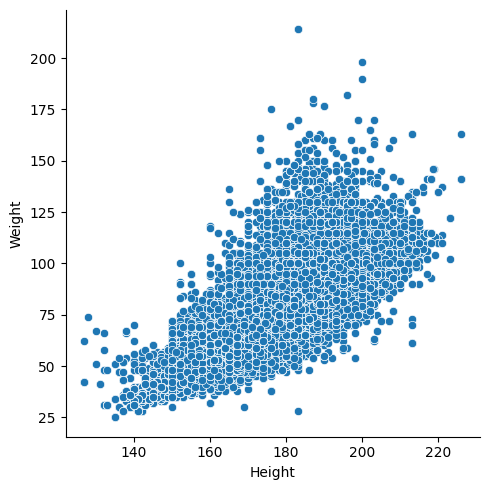

In [76]:
sns.relplot(data= olympics, x='Height', y='Weight',kind = 'scatter')

# the scatterplot of Height and Weight, using different colors and styles of dots for different Sex

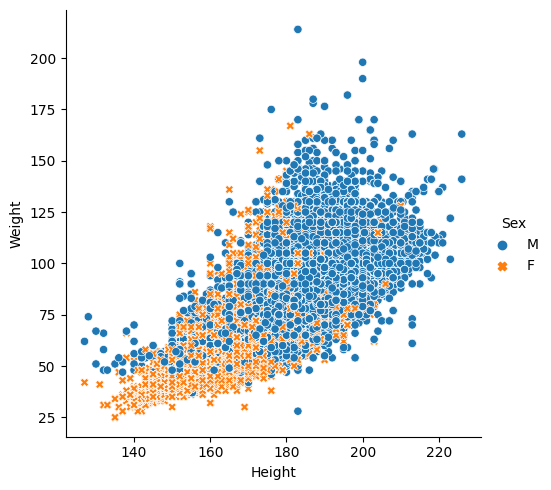

In [77]:
sns.relplot(data= olympics, x='Height', y='Weight',hue = 'Sex', style = 'Sex')

# the pairwise relationships of Age, Height, Weight

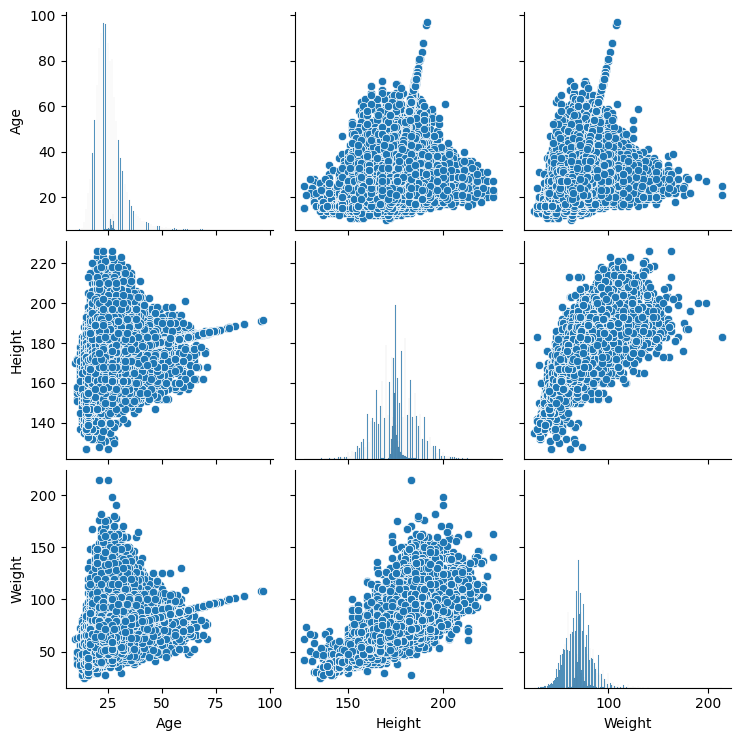

In [78]:
sns.pairplot(olympics[['Age','Height','Weight']])

# the pairwise relationships of Age, Height, Weight, with different colors for Sex

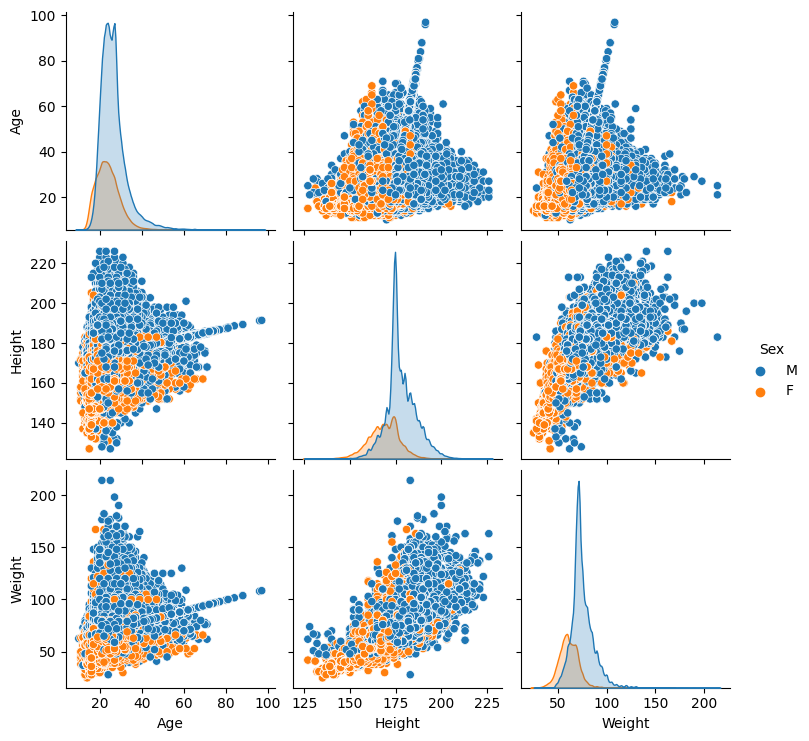

In [81]:
sns.pairplot(olympics[['Age','Height','Weight','Sex']],hue = 'Sex')

# The correlation matrix of Age, Height, Weight

In [82]:
olympics[['Age','Height', 'Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.161797,0.264409
Height,0.161797,1.000000,0.799258
Weight,0.264409,0.799258,1.000000


# Heatmap to demonstrate the correlation matrix of Age, Height, Weight

<Axes: >

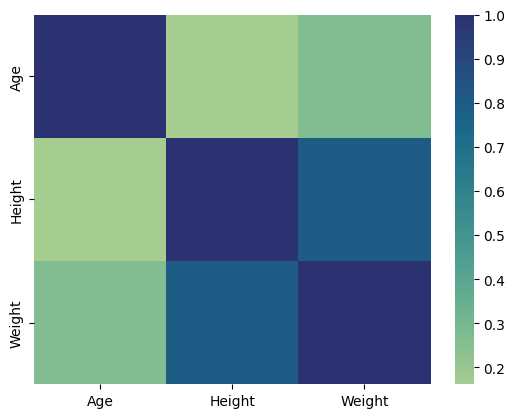

In [87]:
sns.heatmap(olympics[['Age','Height', 'Weight']].corr(), cmap = 'crest')

# the histograms of Age, with different colors for different Sex

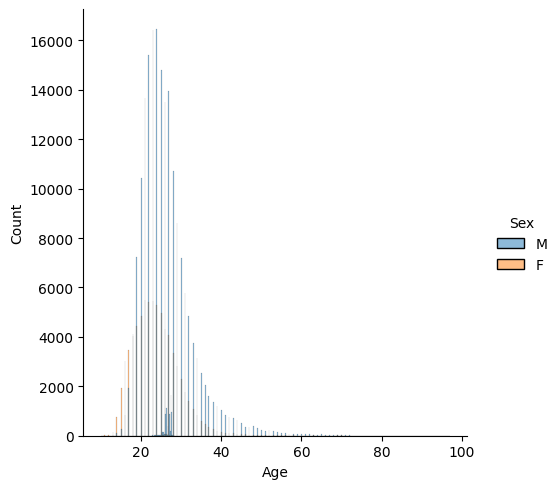

In [88]:
sns.displot(data = olympics,x = 'Age', hue = 'Sex',aspect = 2) 

# the changes of average Age across Year by line charts, with separate lines for different Season using different colors

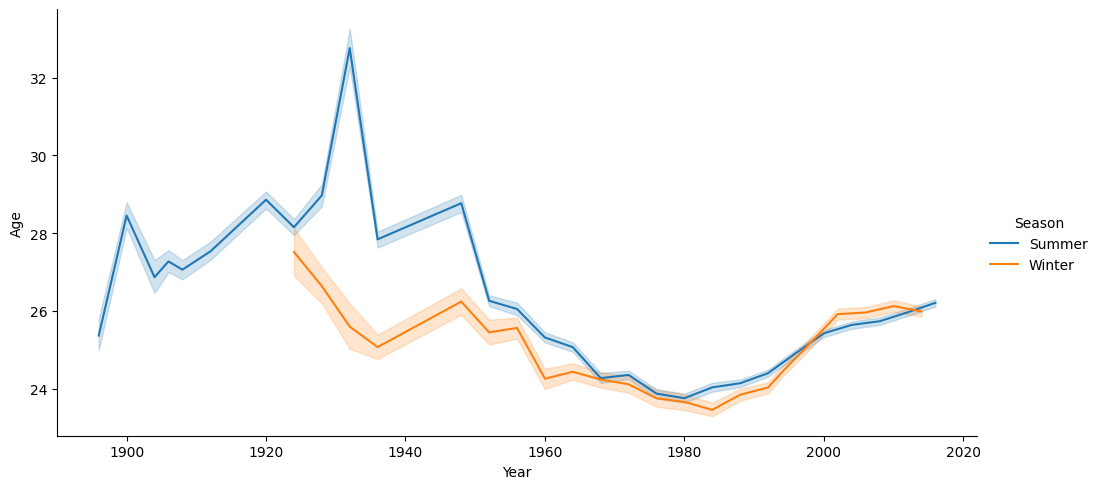

In [91]:
sns.relplot(data = olympics,x = 'Year',y = 'Age', hue = 'Season',  kind = 'line',aspect = 2) 

# The distributions of Age for different Sex using boxplots

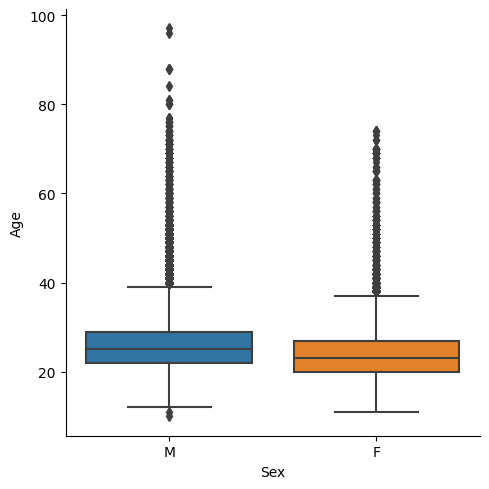

In [94]:
sns.catplot(data = olympics,y = 'Age',x = 'Sex',  kind = 'box') 

# The distributions of Age for different Sex using violin plots

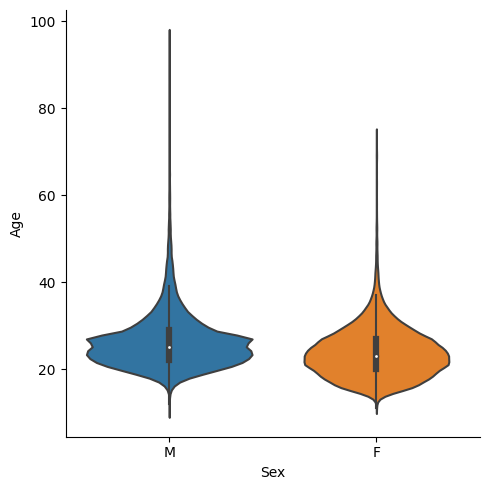

In [95]:
sns.catplot(data = olympics,y = 'Age',x = 'Sex',  kind = 'violin') 

# The distributions of Age for different Sex using boxplots, with different colors of plots for different Season

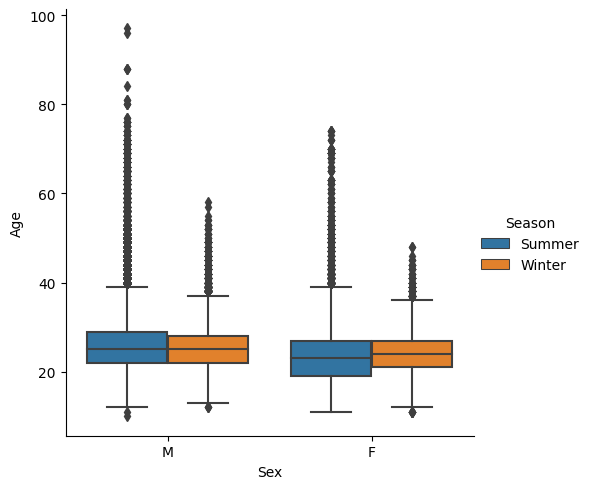

In [96]:
sns.catplot(data = olympics,y = 'Age',x = 'Sex',  kind = 'box',hue = 'Season') 

# Count plots to look at the changes of number of athlete-events across Year, for different Sex by colors, and different Season on separate plots

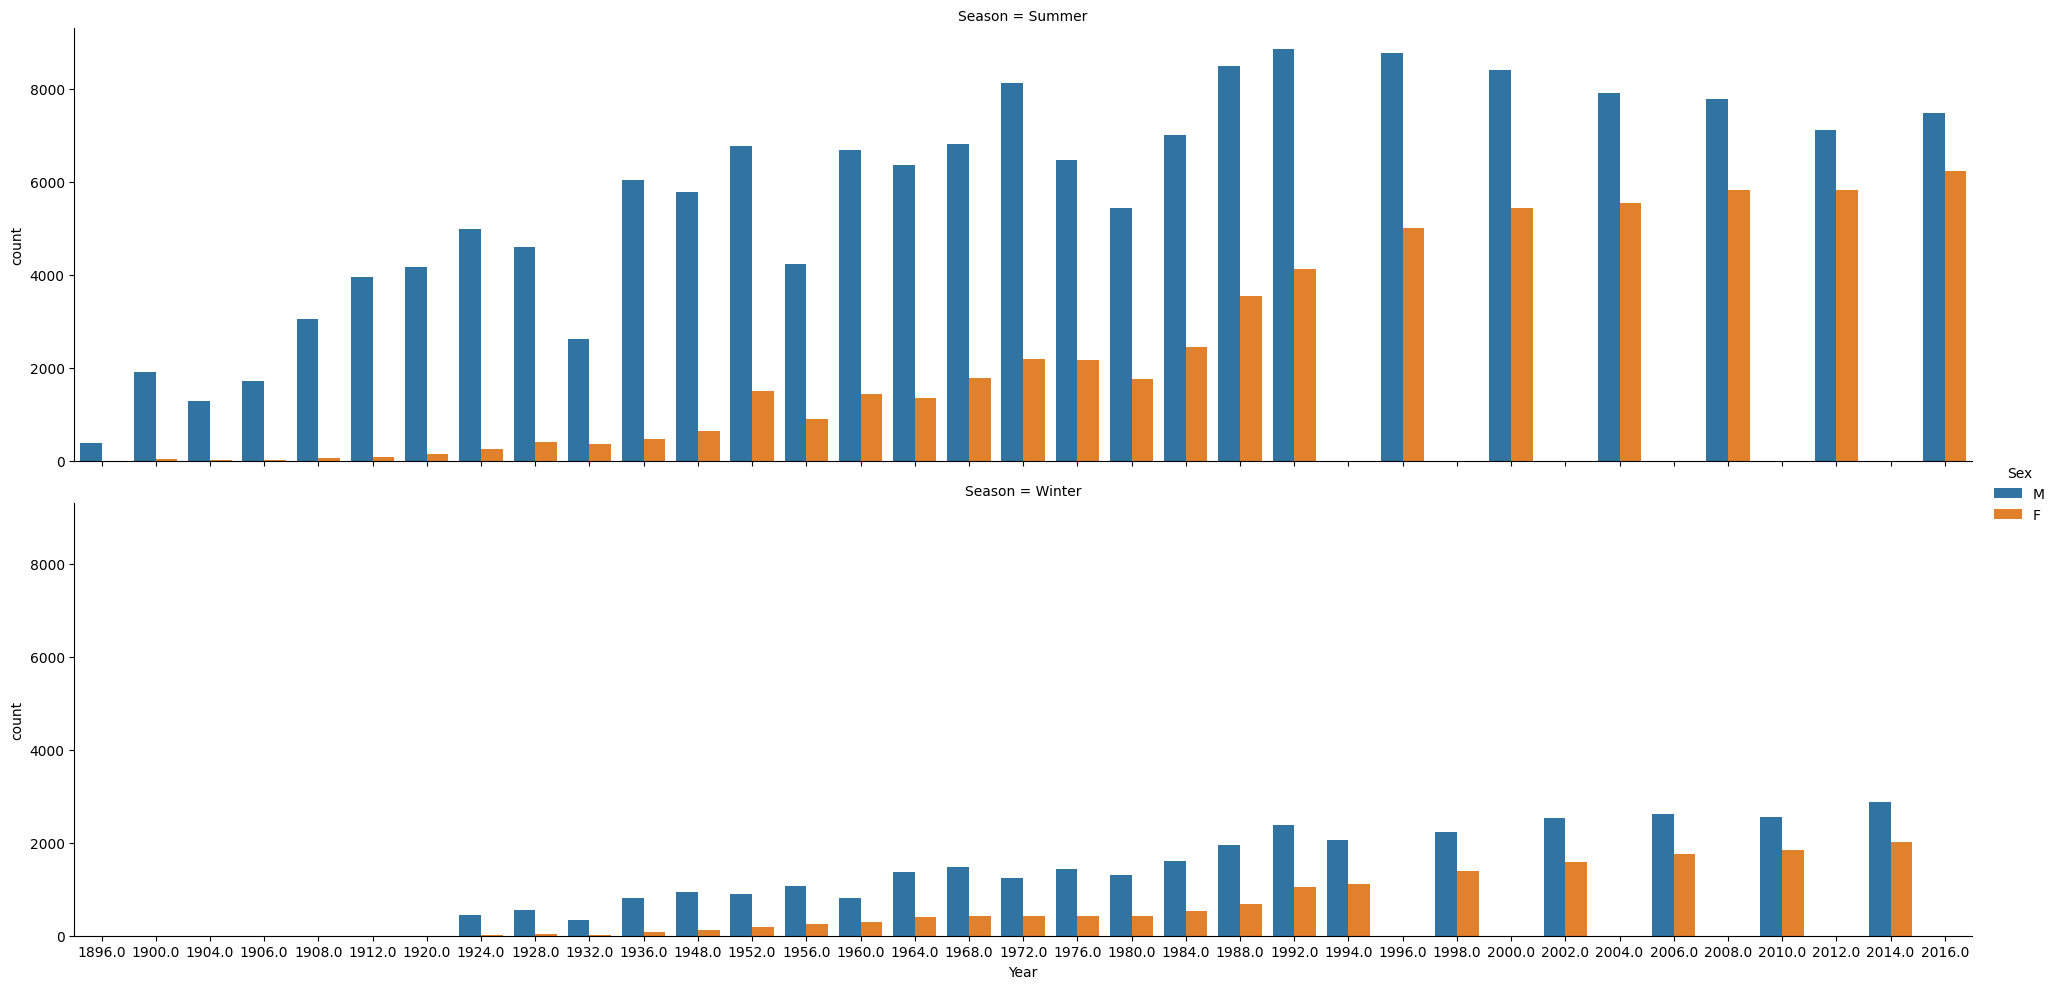

In [99]:
sns.catplot(data = olympics,x ='Year',hue = 'Sex', kind ='count',col = 'Season',col_wrap=1, aspect=4) 